In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
data = pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/alone-control-test.csv', sep=',',header=0)
data

,time,415nm,445nm,480nm,515nm,555nm,590nm,630nm,680nm,Clear,NIR
0,2023-02-01 14:52:00,2026,7029,3412,8303,16544,18485,14469,7027,36506,2586
1,2023-02-01 14:52:00,2009,6958,3381,8210,16450,18348,14398,6975,36274,2586
2,2023-02-01 14:52:01,2007,6960,3380,8206,16449,18347,14400,6977,36265,2587
3,2023-02-01 14:52:01,2009,6960,3381,8208,16446,18337,14399,6978,36272,2587
4,2023-02-01 14:52:02,2007,6961,3380,8212,16451,18343,14398,6977,36258,2585
...,...,...,...,...,...,...,...,...,...,...,...
773,2023-02-01 15:00:02,2015,6971,3392,8224,16469,18364,14410,6992,36313,2598
774,2023-02-01 15:00:02,2015,6961,3392,8224,16465,18359,14412,6989,36317,2599
775,2023-02-01 15:00:03,2014,6954,3391,8222,16468,18365,14411,6988,36339,2600
776,2023-02-01 15:00:04,2013,6959,3389,8220,16472,18362,14415,6986,36352,2601


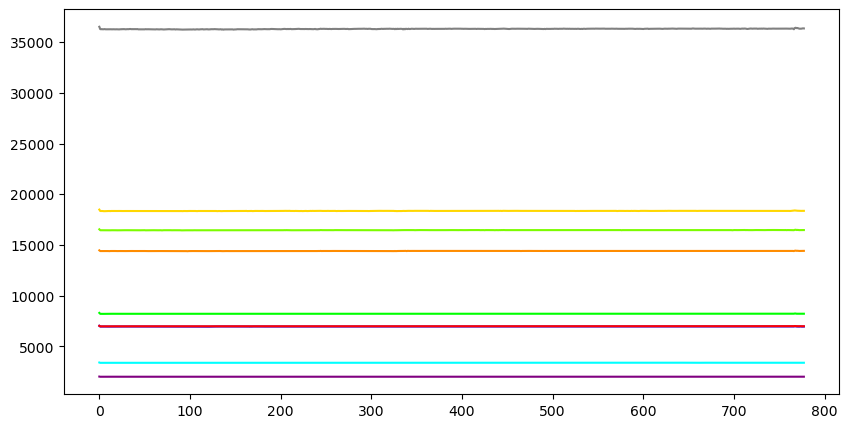

In [48]:
time = data['time'].to_list()
labels = data.columns.to_list()
jdat = data.drop(columns='time').to_numpy().T
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(jdat)-1):
    ax.plot(np.arange(len(jdat[0])), jdat[i], color=col[i])
plt.show()



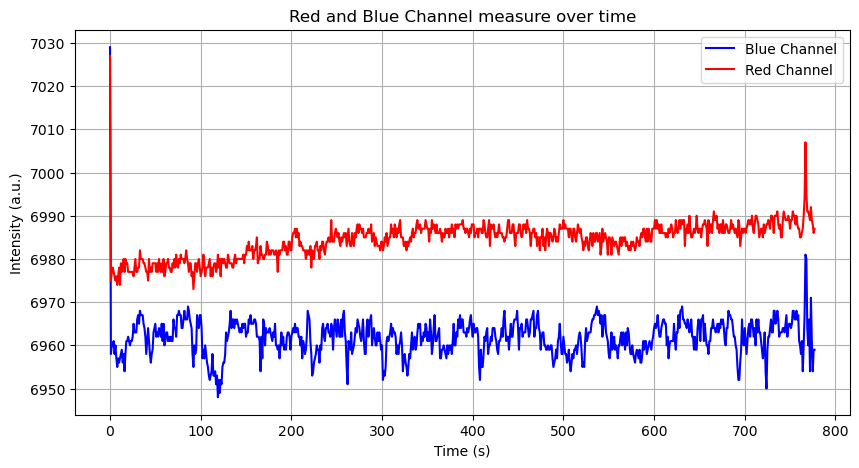

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(len(jdat[0])), jdat[1], label='Blue Channel', color='blue')
ax.plot(np.arange(len(jdat[0])), jdat[7], label='Red Channel', color='red')
plt.grid()
plt.legend()
plt.title('Red and Blue Channel measure over time')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()
fig.savefig('b-vs-r.png', facecolor=fig.get_facecolor(), edgecolor='none')
